# Getting Data

In [257]:
# loading libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Read .csv file

In [258]:
file = pd.read_csv('marketing_customer_analysis.csv')

In [259]:
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 01 - Cleaning / Wrangling / EDA

### Standardize header names.

In [260]:
# assigning variable to headers
column_names = file.columns

In [261]:
# transforming to lower case insert, replace(' ’, ‘_’)
cols = []
for i in range(len(column_names)):
    cols.append(column_names[i].lower().replace(" ","_"))

In [262]:
file.columns = cols
dataset = file

In [263]:
dataset.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [264]:
# convert month
dataset['effective_to_date'] = pd.DatetimeIndex(dataset['effective_to_date']).month

In [265]:
dataset.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 04 New Lab Start (14th of April)

### Q0 Copy of the dataset & Q1 Outlier detection and removal

In [266]:
# copy of dataset
df_copy = dataset
df_copy.shape

(9134, 24)

In [267]:
# outlier deletion by removing upper and lower 5% quantile for "customer lifetime value"
upper_lim = df_copy['customer_lifetime_value'].quantile(.95)
lower_lim = df_copy['customer_lifetime_value'].quantile(.05)

df_copy = df_copy[(df_copy['customer_lifetime_value'] < upper_lim) & (df_copy['customer_lifetime_value'] > lower_lim)]

In [268]:
# outlier deletion by removing upper and lower 5% quantile for "income"
upper_lim = df_copy['income'].quantile(.95)
lower_lim = df_copy['income'].quantile(.05)

df_copy = df_copy[(df_copy['income'] < upper_lim) & (df_copy['income'] > lower_lim)]

In [269]:
# reset index
df_copy = df_copy.reset_index(drop=True)

In [270]:
df_copy.shape

(5822, 24)

### Q3 Normalization of continous variables, drop normalized from remaining df

In [271]:
# Continous are: customer lifetime value, income, total claim amount 
# (total claim amount is the dependent variable and therefore excluded from normalization)
x = df_copy[['customer_lifetime_value', 'income']]

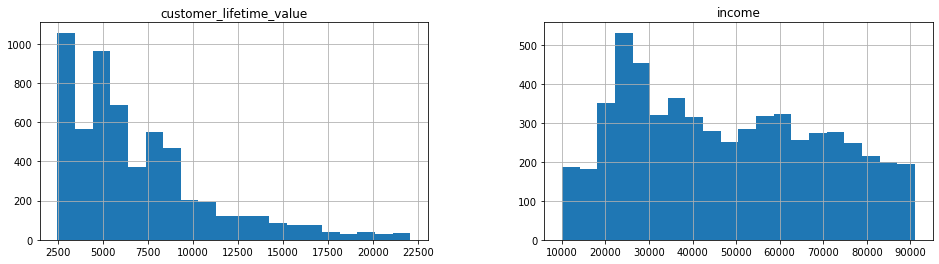

In [272]:
x.hist(bins=20, figsize=(16, 4), layout=(1, 2));

In [273]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x)
x_normalised = transformer.transform(x)
x_normalised = pd.DataFrame(x_normalised)

In [274]:
x.shape

(5822, 2)

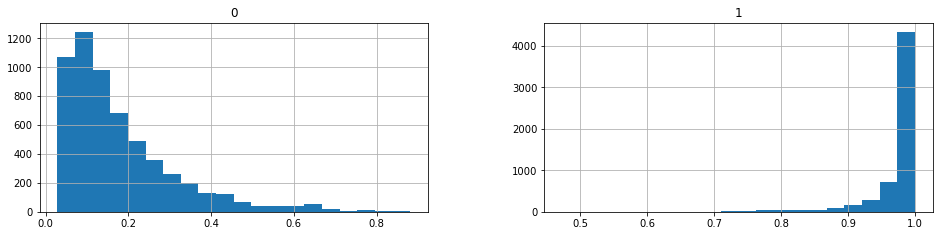

In [275]:
x_normalised.hist(bins=20, figsize=(16, 8), layout=(2, 2));

In [276]:
# drop normalized from df to concatenate later

x_num_remain = df_copy.select_dtypes('number')
x_num_remain = x_num_remain.drop(['customer_lifetime_value', 'income'], axis=1)

In [277]:
x_num_remain.head()

,effective_to_date,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2,69,32,5,0,1,384.811147
1,2,108,18,38,0,2,566.472247
2,2,73,12,44,0,1,138.130879
3,1,69,14,94,0,2,159.383042
4,2,67,0,13,0,9,321.600000


## Q4 Encoding Categorical data with one hot encoder

In [278]:
# copy categorical data
x_cat = df_copy.select_dtypes('object').drop('customer', axis=1)
for col in x_cat.columns:
    encoded_columns = pd.get_dummies(x_cat[col])
    x_cat = x_cat.join(encoded_columns).drop(col, axis=1)

In [279]:
x_cat.head()

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Basic,Extended,Premium,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [280]:
x_cat.shape

(5822, 56)

In [281]:
df_copy = pd.concat((x_normalised, x_cat, x_num_remain), axis = 1)

## Q5 Transform the time variables (day, week and month) to integers.

In [284]:
# Was already done in an earlier step (check above)

In [283]:
# effective 

## Q6 make sure that every column is numerical

In [288]:
df_copy.dtypes.value_counts()

uint8      56
int64       6
float64     3
dtype: int64